In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ad_views = pd.read_csv(r"/Users/akash/Desktop/trainings/challenge/user_ad_views.csv")
advertisers_info = pd.read_csv(r"/Users/akash/Desktop/trainings/challenge/advertisers_info.csv")


In [2]:
# checking the data
print(ad_views.head())
print(ad_views.shape)
print(ad_views.info())
print(ad_views.describe())

   install           user id              game app country  \
0        0  4Hw9w1ahkO6YyXjg  4orCk3bBPLAf3qnZrE2m      US   
1        0  hjzrSmIgdjaEUzOV  4orCk3bBPLAf3qnZrE2m      DE   
2        0  4Hw9w1ahkO6YyXjg  4orCk3bBPLAf3qnZrE2m      US   
3        0  NQiVDdo7l44MvMMo  IUgSZ6L7m92e14QKrGFd      BR   
4        0  n074Wye5PjzGtz3U  4orCk3bBPLAf3qnZrE2m      IN   

             advertiser  age  user quality score   createdat  spending  \
0  IsnShevMFAoSETkREGbb  4.0                   1  1675209600  0.020103   
1  3SABwx0gaB06Nf7vtLbM  2.0                   1  1675209600  0.012934   
2  IsnShevMFAoSETkREGbb  4.0                   1  1675209600  0.020103   
3  0T7RXIs4iDYN2cUJ1Cra  2.0                   2  1675209613  0.000637   
4  fwXiEmV4DPhgtCE7kdhB  3.0                   1  1675209621  0.000288   

   earning carrier  mccmnc  
0      0.0   lqkHf  312503  
1      0.0   Mg4KZ  262777  
2      0.0   lqkHf  312503  
3      0.0   Llb0G  724670  
4      0.0   czVgl  404777  
(310024,

In [3]:
# checking the data
print(advertisers_info.head())
print(advertisers_info.shape)
print(advertisers_info.info())
print(advertisers_info.describe())

  country            advertiser       cpi
0      US  g6HqZe7Ev4uAnvzcIWYC  0.500000
1      US  0pWbqOUFkryuIs6BtsS6  0.551724
2      US  ek5DxAfTfZBW2TihkbRR  0.603448
3      US  fwXiEmV4DPhgtCE7kdhB  0.655172
4      US  gqFdk16BCaEiyOJZEPWl  0.706897
(210, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     210 non-null    object 
 1   advertiser  210 non-null    object 
 2   cpi         210 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.0+ KB
None
              cpi
count  210.000000
mean     0.803222
std      3.101427
min      0.010000
25%      0.049526
50%      0.576724
75%      0.910560
max     45.000000


In [4]:
# getting maximum and minimum value of date
datetime_object = pd.to_datetime(ad_views['createdat'], unit='s')
ad_views['createdat'] = datetime_object.apply(lambda x: x.strftime('%d-%m-%Y'))
print(ad_views['createdat'].min())
print(ad_views['createdat'].max())

01-02-2023
28-02-2023


In [5]:
# unique value for each column and counts
for col in ad_views.columns:
  print(ad_views[col].value_counts())

install
0    303199
1      6825
Name: count, dtype: int64
user id
4Hw9w1ahkO6YyXjg    2
O7NZn5xEHkae5pmX    2
SvebUP6otjAp7mGp    2
kfefKpEQwvZ8tvjy    2
sHEe1QZk8hrUyRIe    2
                   ..
59uGjyKRkiKZPPcN    1
4TshJ84C6I5qVTSy    1
Iy6zaCIqjRjyiYHg    1
9rSk9agC0XNZeg0O    1
T4dOyMkQWPN8IdQ6    1
Name: count, Length: 300024, dtype: int64
game app
8r92kfSTOHs7KSd0zCU8    52163
gVRWs2fMrsM0PEhG18hX    51922
eVy14GUauNxRgry1jzzc    51664
IUgSZ6L7m92e14QKrGFd    51626
1yXfAufLTi688uUPvfZm    51427
4orCk3bBPLAf3qnZrE2m    51191
eVy14GUauNxRgry1jzQD       31
Name: count, dtype: int64
country
AT    44528
AU    44521
GB    44394
BR    44365
DE    44202
US    44093
IN    43921
Name: count, dtype: int64
advertiser
fwXiEmV4DPhgtCE7kdhB    10574
Rd6lCNb8JSuLncR1zdTo    10540
nF6yO8APP4usjB3JE8On    10510
gqFdk16BCaEiyOJZEPWl    10475
uj6SjhziNLHHbnNOLMys    10470
0pWbqOUFkryuIs6BtsS6    10435
jth3Fg7Px8uh4N1tEupI    10417
WtEYQX4kuXyvO02qokWb    10414
0T7RXIs4iDYN2cUJ1Cra    10390
kx79Gx

In [6]:
# unique value count for each column
for col in ad_views.columns:
  print(col, ': ',ad_views[col].nunique())
print(ad_views.shape)

install :  2
user id :  300024
game app :  7
country :  7
advertiser :  30
age :  5
user quality score :  3
createdat :  28
spending :  204
earning :  208
carrier :  20
mccmnc :  413
(310024, 12)


### 1. In which country, game, and for which advertiser, did we have the highest IPM? Why can’t we trust this number fully?

In [7]:
# grouping the data
grouped_country = ad_views.groupby('country').agg({'install': 'sum', 'user id': 'count'})
grouped_game_app = ad_views.groupby('game app').agg({'install': 'sum', 'user id': 'count'})
grouped_advertiser = ad_views.groupby('advertiser').agg({'install': 'sum', 'user id': 'count'})

In [8]:
# calculating ipm
grouped_country['ipm'] = grouped_country['install']/grouped_country['user id']*1000
grouped_country = grouped_country.sort_values(by='ipm', ascending=False)

grouped_game_app['ipm'] = grouped_game_app['install']/grouped_game_app['user id']*1000
grouped_game_app = grouped_game_app.sort_values(by='ipm', ascending=False)

grouped_advertiser['ipm'] = grouped_advertiser['install']/grouped_advertiser['user id']*1000
grouped_advertiser = grouped_advertiser.sort_values(by='ipm', ascending=False)

In [9]:
# printing the results for highest ipm per each group
print('Highest IPM by country:\n', grouped_country.head(1))
print(' ')
print('Highest IPM by game:\n', grouped_game_app.head(1))
print(' ')
print('Highest IPM by advertiser:\n', grouped_advertiser.head(1))

Highest IPM by country:
          install  user id        ipm
country                             
GB          1009    44394  22.728297
 
Highest IPM by game:
                       install  user id         ipm
game app                                          
eVy14GUauNxRgry1jzQD       10       31  322.580645
 
Highest IPM by advertiser:
                       install  user id        ipm
advertiser                                       
i4XAVmM2O71iQ3zbCYfI      253    10212  24.774775


IPM can not be trusted because it focuses on impressions which can be easily manipulated by bots and other forms of non-human traffic and all of these impressions are not seen by users.

### 2. Assume the two CSVs are SQL tables. Write SQL queries that calculate for every combination of country and game app the average and median of CPI and IPM over a sliding window of
### a. 500 views (the window slides on every view)

In [ ]:
/*
ALTER TABLE public.user_ad_views
ALTER COLUMN createdat TYPE TIMESTAMP WITH TIME ZONE 
USING to_timestamp(createdat); 
*/


WITH CombinedData AS (
    SELECT 
        uav.country,
        uav."game app",
        uav.createdat,  
        ai.cpi,
        (CAST(SUM(uav.install) OVER (PARTITION BY uav.country, uav."game app" ORDER BY uav.createdat) AS REAL) * 1000) / 
           ROW_NUMBER() OVER (PARTITION BY uav.country, uav."game app" ORDER BY uav.createdat) AS ipm 
    FROM 
        user_ad_views uav
    JOIN 
        advertisers_info ai ON uav.country = ai.country AND uav.advertiser = ai.advertiser
)
, RankedData AS ( 
  SELECT
        country,
        "game app",
        cpi,
        ipm,
        createdat,
        ROW_NUMBER() OVER (PARTITION BY country, "game app" ORDER BY createdat) as rn
    FROM CombinedData
)
, SlidingWindowData AS (
    SELECT 
        r1.country,
        r1."game app",
        r1.createdat,
        r1.cpi,
        r1.ipm,
        AVG(r2.cpi) AS avg_cpi,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY r2.cpi) AS median_cpi,
        AVG(r2.ipm) AS avg_ipm,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY r2.ipm) AS median_ipm
    FROM 
        RankedData r1
    INNER JOIN RankedData r2 
        ON r1.country = r2.country
        AND r1."game app" = r2."game app"
        AND r2.rn BETWEEN r1.rn - 499 AND r1.rn
    GROUP BY 
        r1.country,
        r1."game app",
        r1.createdat,
        r1.cpi,
        r1.ipm
)
SELECT 
    country,
    "game app",
    createdat,
    avg_cpi,
    median_cpi,
    avg_ipm,
    median_ipm
FROM 
    SlidingWindowData;

### b. 1 day (the window slides every hour) ordered by createdat.
### Example: assume we have the following views with CPI values for one country and game app with ascending createdat value: 0.5, 0.5, 1, 2, 0.5, 1. Then the average CPI over a sliding window of 5 views would be 0.9, 1.

In [ ]:
WITH CombinedData AS (
    SELECT 
        uav.country,
        uav."game app",
        uav.createdat,  
        ai.cpi,
        (CAST(SUM(uav.install) OVER (PARTITION BY uav.country, uav."game app" ORDER BY uav.createdat) AS REAL) * 1000) / 
           ROW_NUMBER() OVER (PARTITION BY uav.country, uav."game app" ORDER BY uav.createdat) AS ipm,
        DATE(uav.createdat) AS view_date  
    FROM 
        user_ad_views uav
    JOIN 
        advertisers_info ai ON uav.country = ai.country AND uav.advertiser = ai.advertiser
), RankedData AS ( 
  SELECT
        country,
        "game app",
        cpi,
        ipm,
        createdat,
        view_date,
        ROW_NUMBER() OVER (PARTITION BY country, "game app", view_date ORDER BY createdat) as rn
    FROM CombinedData
), SlidingWindowData AS (
    SELECT 
        r1.country,
        r1."game app",
        r1.view_date, 
        EXTRACT(HOUR FROM r1.createdat) AS view_hour,
        AVG(r2.cpi) AS avg_cpi,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY r2.cpi) AS median_cpi,
        AVG(r2.ipm) AS avg_ipm,
        PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY r2.ipm) AS median_ipm
    FROM 
        RankedData r1
    INNER JOIN RankedData r2 
        ON r1.country = r2.country
        AND r1."game app" = r2."game app"
        AND r1.view_date = r2.view_date 
        AND r2.createdat BETWEEN r1.createdat - INTERVAL '23 hour' AND r1.createdat 
    GROUP BY 
        r1.country,
        r1."game app",
        r1.view_date,
        EXTRACT(HOUR FROM r1.createdat)
)
SELECT 
    country,
    "game app",
    view_date,
    view_hour,  
    avg_cpi,
    median_cpi,
    avg_ipm,
    median_ipm
FROM 
    SlidingWindowData
ORDER BY 
    country, 
    "game app", 
    view_date, 
    view_hour;

This table will easily lead to highlighting of trends between various groups and performance can be easily compared.

### 3. Using only plots, describe which advertiser performs best in terms of CPM (=IPM * CPI). Consider not only their overall performance, but also per game and country. Please also explain your choice of plots.

I chose barplot as its easy to interpret the results from it and also the outliers or the values which seems to be entered wrong is clearly highlighted.

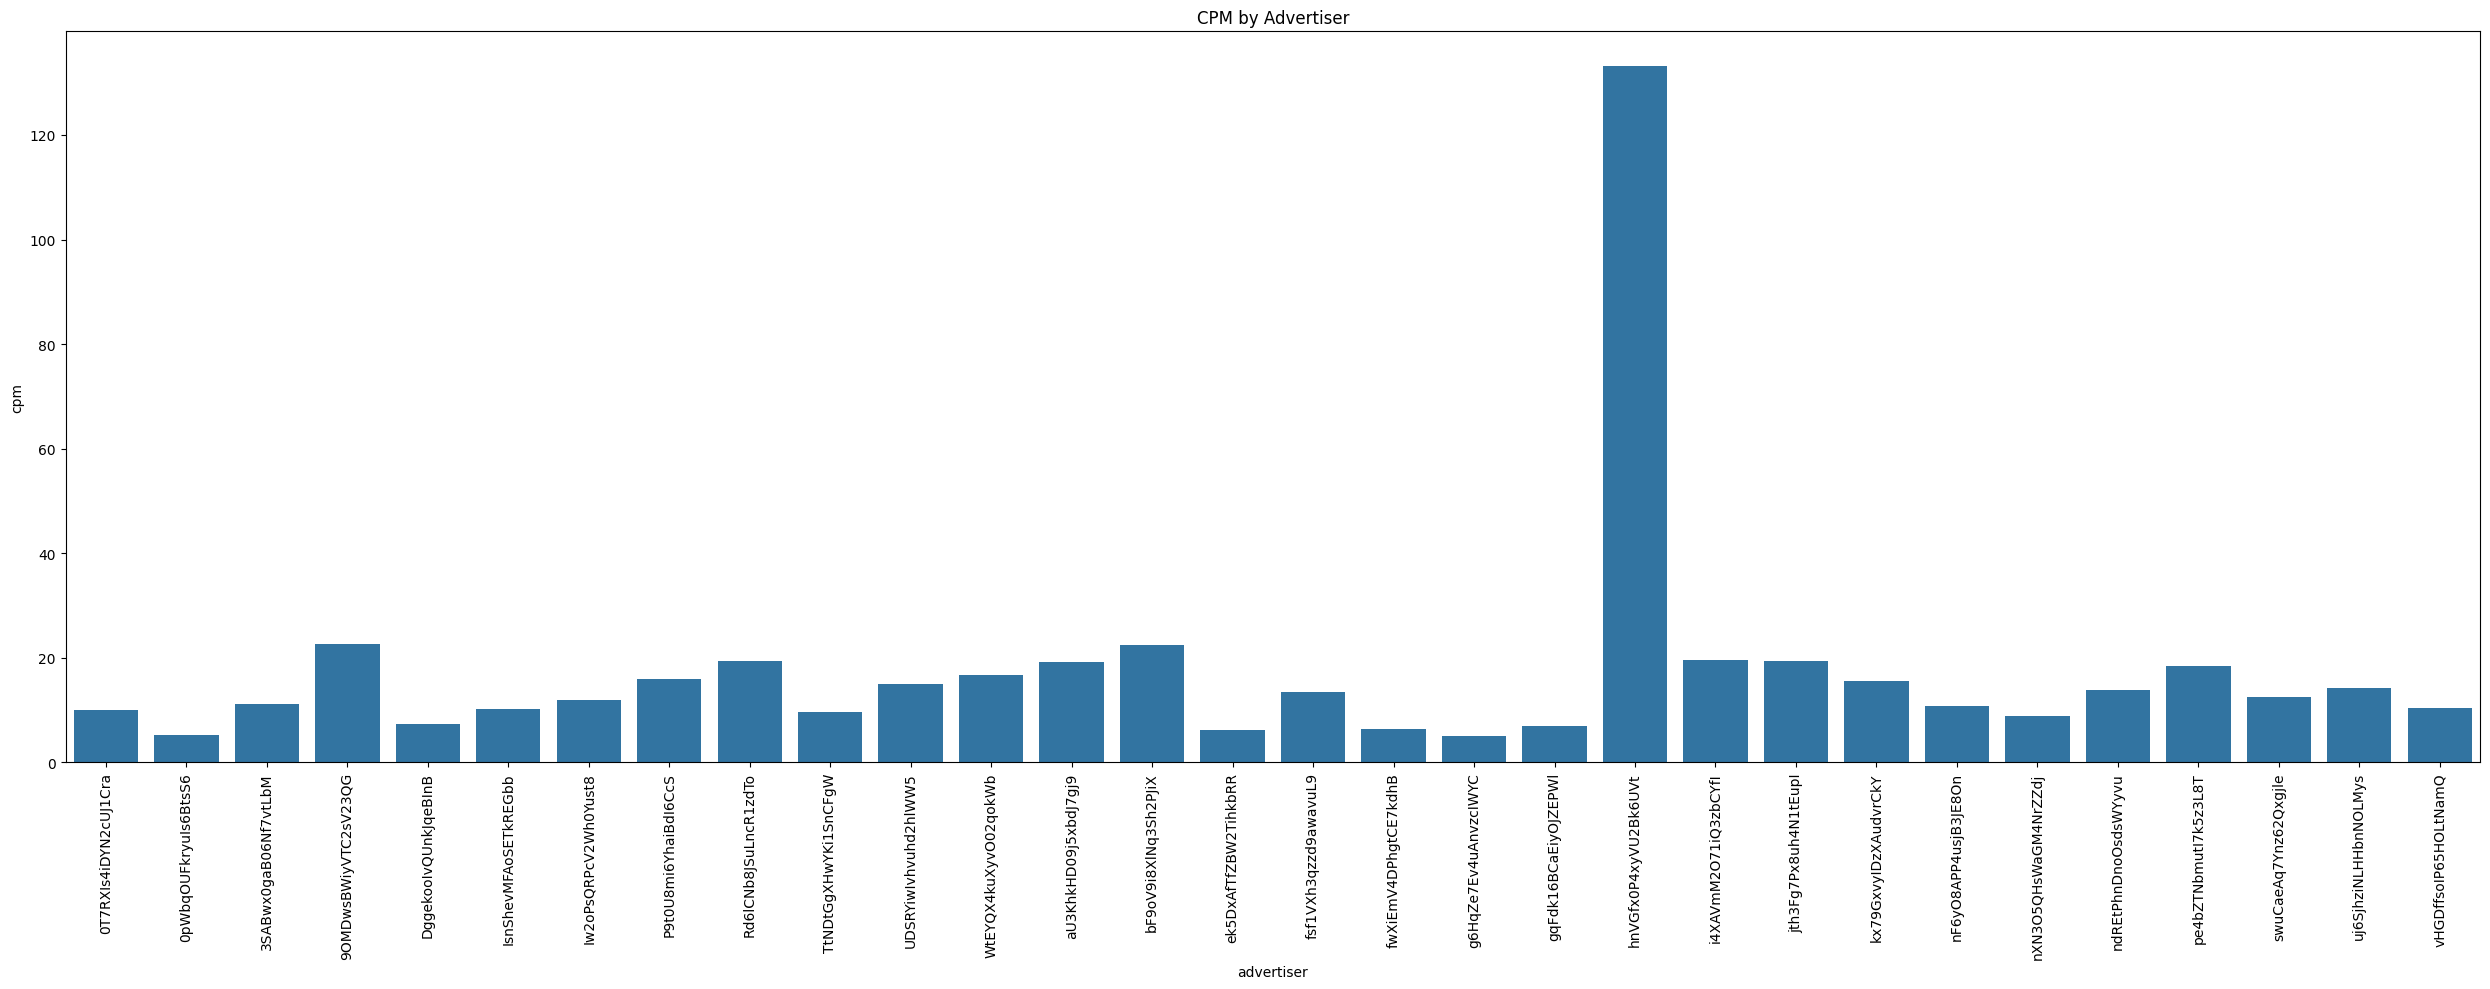

In [10]:
# grouping based on advertisers and calculating ipm and cpm
ad_views_grouped_advertiser = ad_views.groupby(['advertiser', 'country']).agg({'install': 'sum', 'user id': 'count'})
ad_views_grouped_advertiser['ipm'] = ad_views_grouped_advertiser['install']/ad_views_grouped_advertiser['user id']*1000

# merging the data
merged_data_grouped_advertiser = pd.merge(ad_views_grouped_advertiser, advertisers_info, on=['country', 'advertiser'], how='inner')

merged_data_grouped_advertiser['cpm'] = merged_data_grouped_advertiser['ipm']*merged_data_grouped_advertiser['cpi']
merged_data_grouped_advertiser = merged_data_grouped_advertiser.sort_values(by='cpm', ascending=False)
merged_data_grouped_advertiser.reset_index(drop=False, inplace=True)

data_grouped_advertiser = merged_data_grouped_advertiser.groupby(['advertiser']).agg({'cpm': 'mean'})


# plotting the barplot
plt.figure(figsize=(25, 10))
sns.barplot(data=data_grouped_advertiser, y='cpm', x=data_grouped_advertiser.index)

plt.title('CPM by Advertiser')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

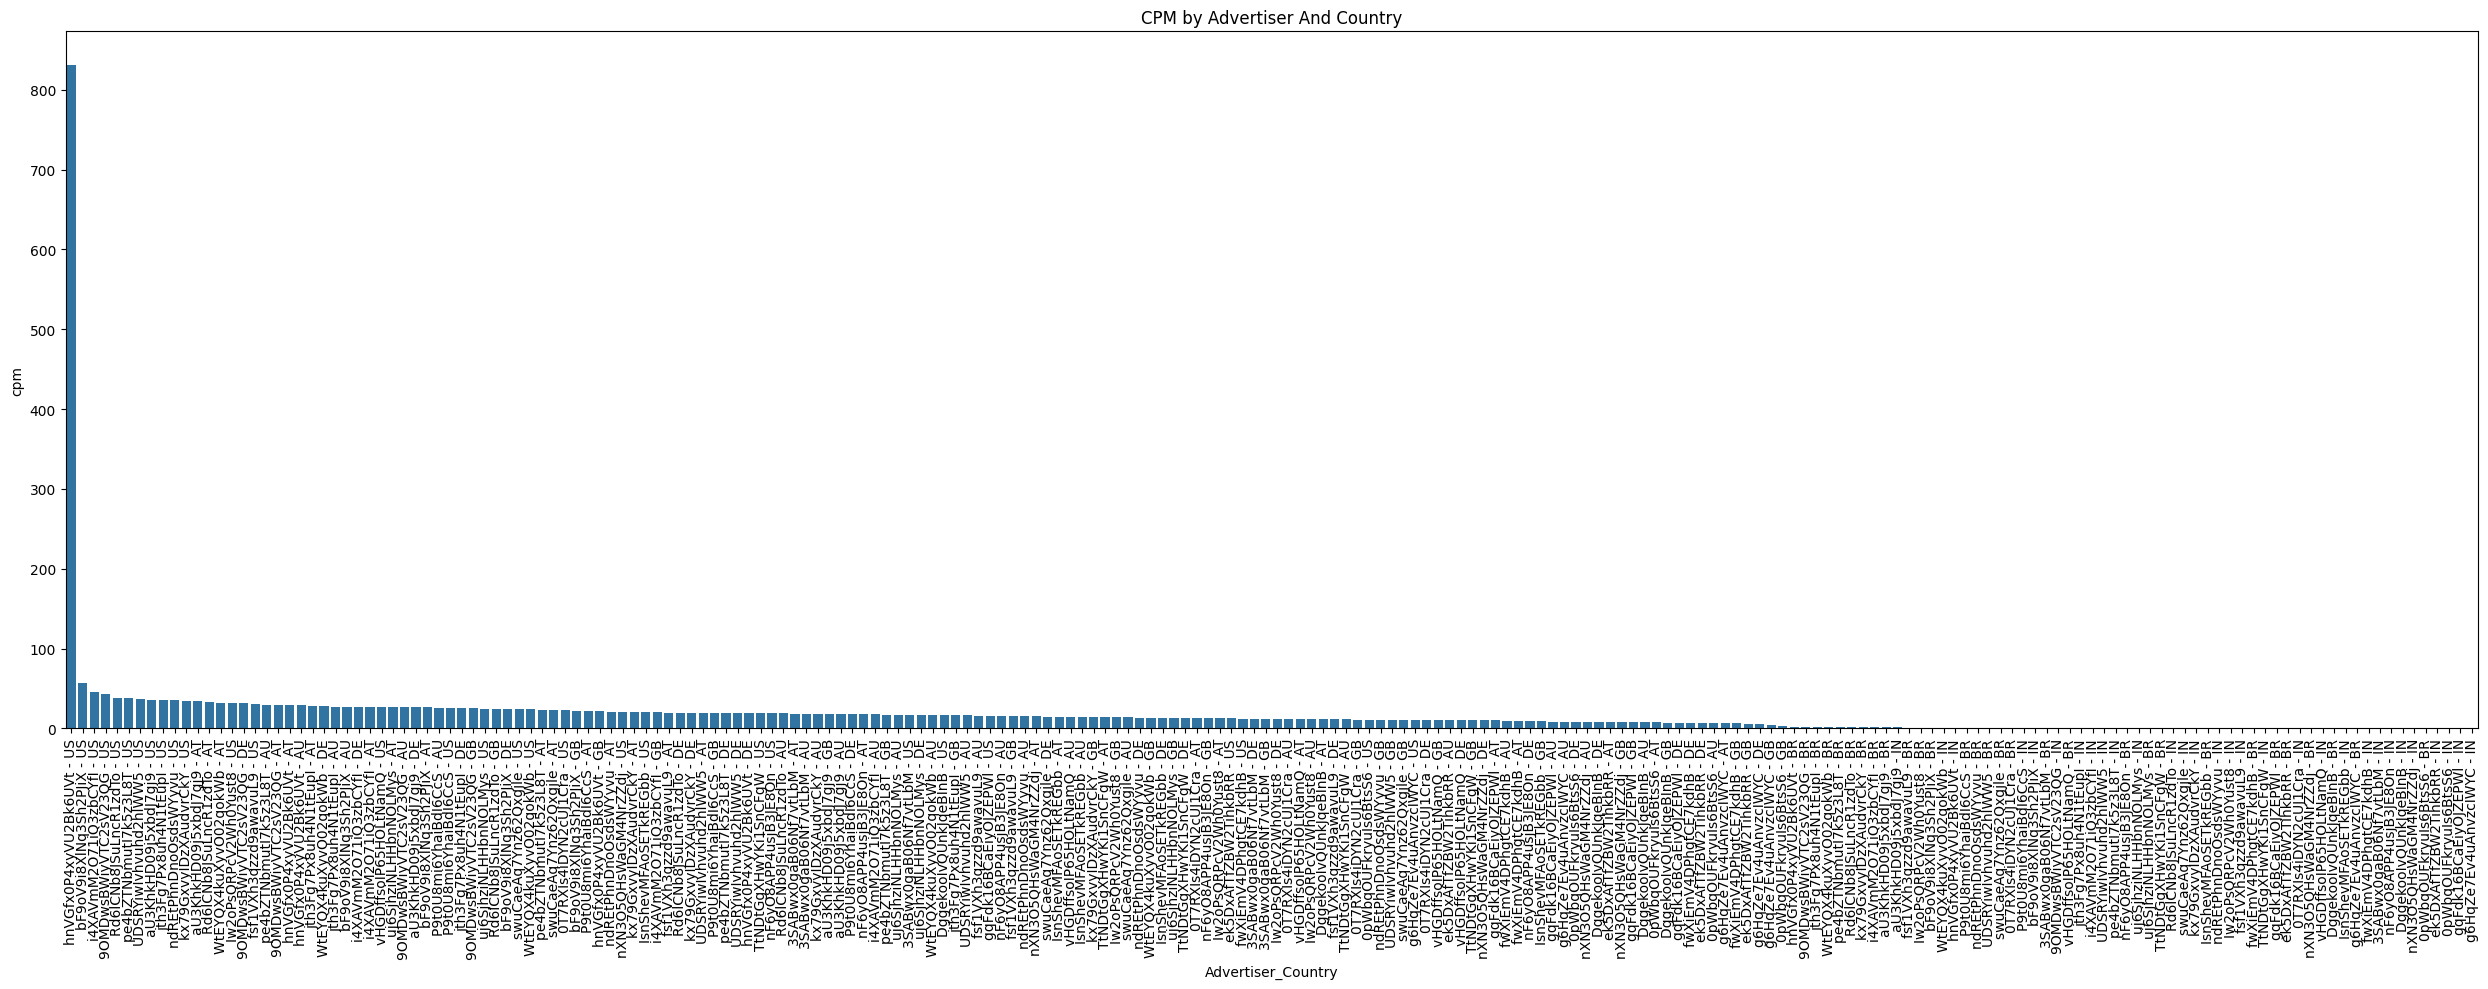

In [11]:
# grouping based on advertisers and country and calculating ipm and cpm
ad_views_grouped_advertiser_country = ad_views.groupby(['advertiser', 'country']).agg({'install': 'sum', 'user id': 'count'})
ad_views_grouped_advertiser_country['ipm'] = ad_views_grouped_advertiser_country['install']/ad_views_grouped_advertiser_country['user id']*1000

# merging the data
merged_data_grouped_advertiser_country = pd.merge(ad_views_grouped_advertiser_country, advertisers_info, on=['country', 'advertiser'], how='inner')

merged_data_grouped_advertiser_country['cpm'] = merged_data_grouped_advertiser_country['ipm']*merged_data_grouped_advertiser_country['cpi']
merged_data_grouped_advertiser_country = merged_data_grouped_advertiser_country.sort_values(by='cpm', ascending=False)
merged_data_grouped_advertiser_country['Advertiser_Country'] = merged_data_grouped_advertiser_country.apply(lambda x: x['advertiser']+ ' - '+x['country'], axis=1)
merged_data_grouped_advertiser_country.reset_index(drop=False, inplace=True)

# plotting the barplot
plt.figure(figsize=(25, 10))
sns.barplot(data=merged_data_grouped_advertiser_country, y='cpm', x=merged_data_grouped_advertiser_country['Advertiser_Country'])
plt.title('CPM by Advertiser And Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

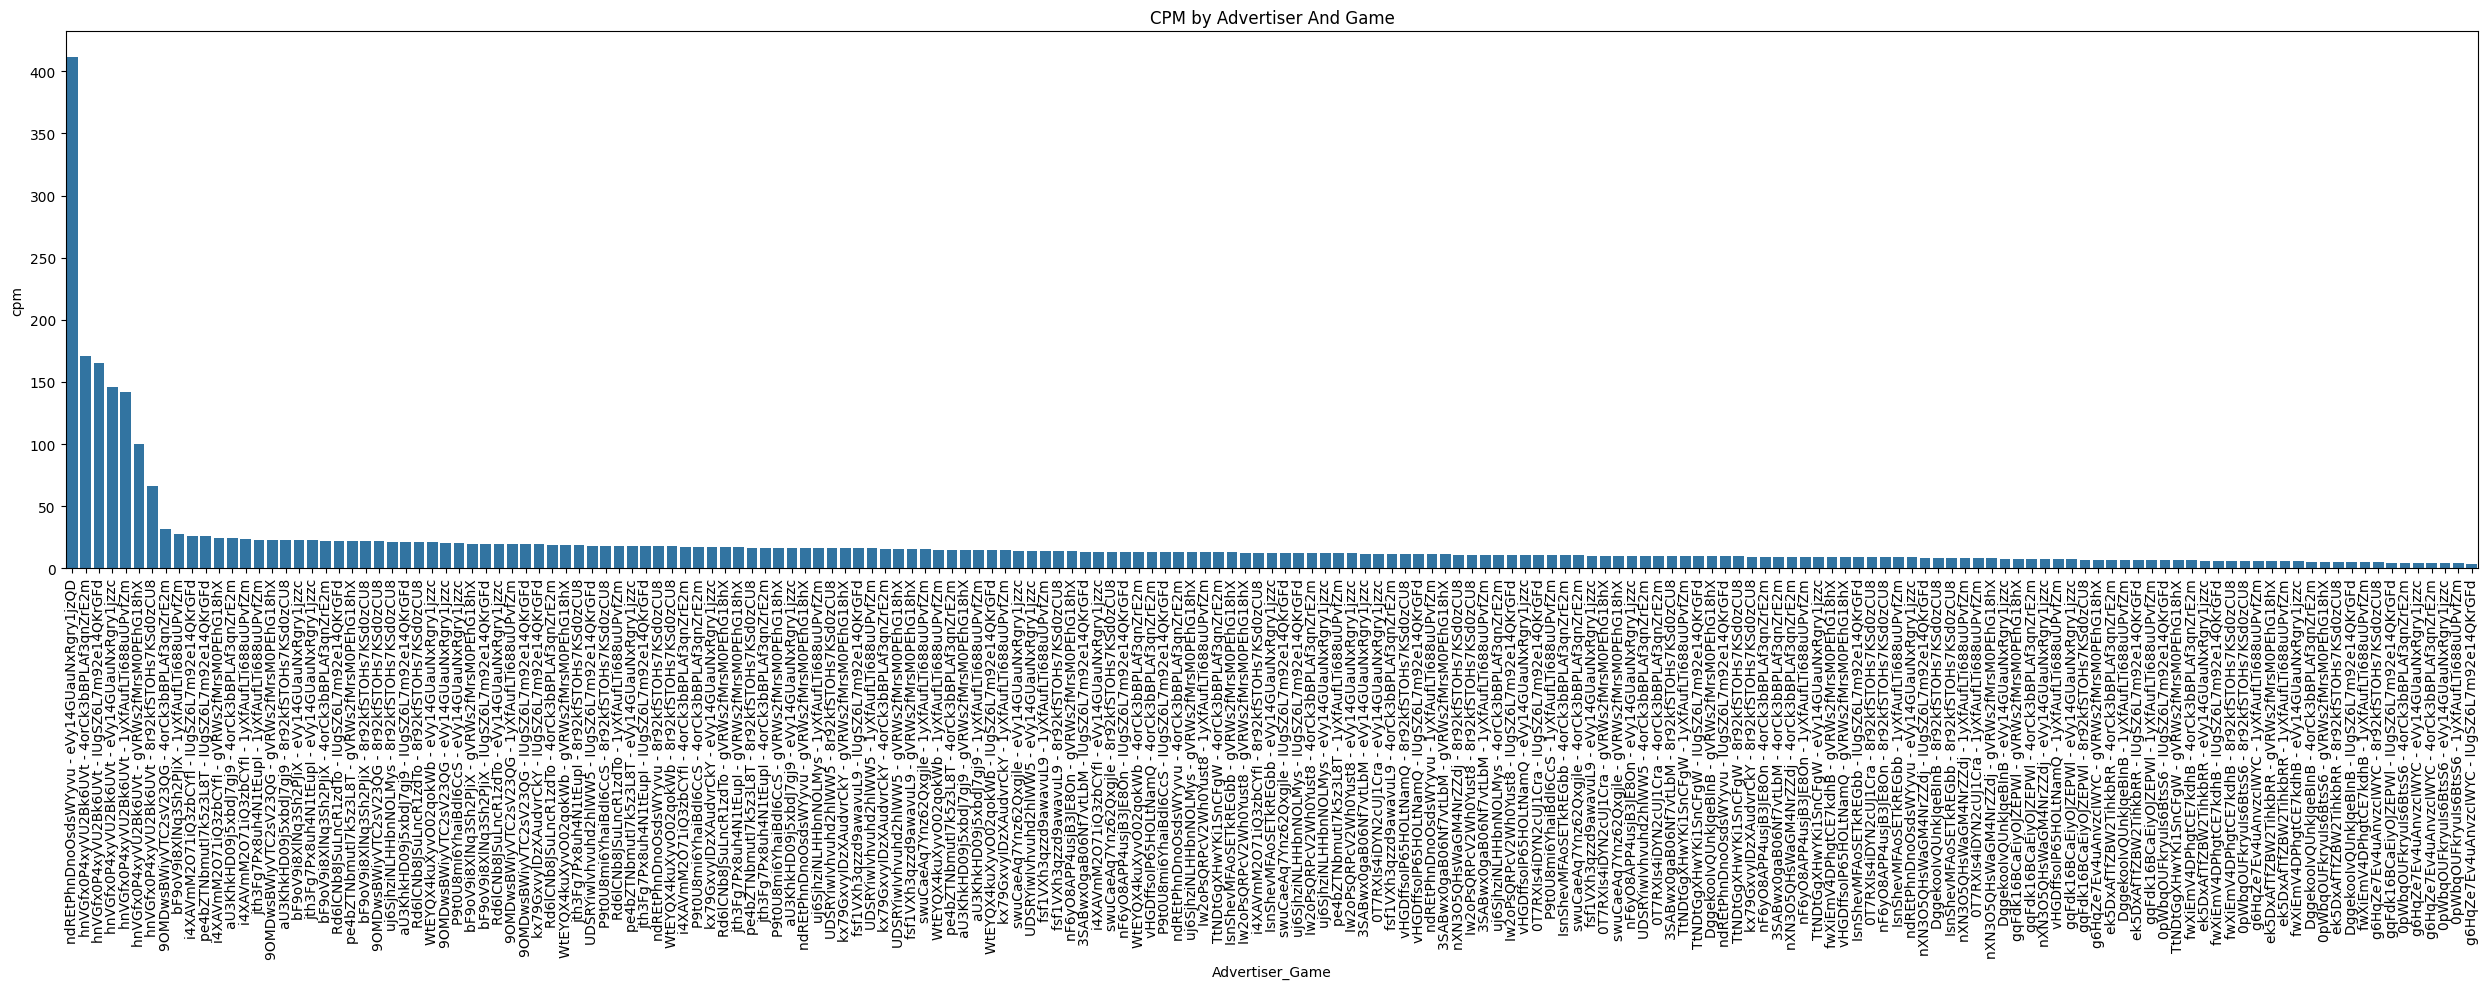

In [12]:
# grouping based on advertisers and game app and calculating ipm and cpm
merged_data_grouped_advertiser_game = ad_views.groupby(['advertiser', 'country', 'game app']).agg({'install': 'sum', 'user id': 'count'})
merged_data_grouped_advertiser_game.reset_index(drop=False, inplace=True)
merged_data_grouped_advertiser_game['ipm'] = merged_data_grouped_advertiser_game['install']/merged_data_grouped_advertiser_game['user id']*1000

# merging the data
merged_data_grouped_advertiser_game_app = pd.merge(merged_data_grouped_advertiser_game, advertisers_info, on=['country', 'advertiser'], how='inner')
merged_data_grouped_advertiser_game_app['cpm'] = merged_data_grouped_advertiser_game_app['ipm']*merged_data_grouped_advertiser_game_app['cpi']

merged_data_grouped_advertiser_game_app = merged_data_grouped_advertiser_game_app.groupby(['advertiser', 'game app']).agg({'cpm': 'mean'})
merged_data_grouped_advertiser_game_app.reset_index(drop=False, inplace=True)

merged_data_grouped_advertiser_game_app = merged_data_grouped_advertiser_game_app.sort_values(by='cpm', ascending=False)
merged_data_grouped_advertiser_game_app['Advertiser_Game'] = merged_data_grouped_advertiser_game_app.apply(lambda x: x['advertiser']+ ' - '+x['game app'], axis=1)
merged_data_grouped_advertiser_game_app.reset_index(drop=False, inplace=True)

# plotting the barplot
plt.figure(figsize=(25, 10))
sns.barplot(data=merged_data_grouped_advertiser_game_app, y='cpm', x=merged_data_grouped_advertiser_game_app['Advertiser_Game'])
plt.title('CPM by Advertiser And Game')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###4. Use hypothesis testing to identify whether any advertiser’s performance is statistically significantly better than that of others.
###Bonus: for any pair of advertisers that does not show a statistically significant change calculate how many views would be needed (assuming that the IPM remains the same) to show a statistically significant difference.

In [13]:
from scipy.stats import f_oneway

# group the data by advertiser
grouped_data = ad_views.groupby("advertiser")["earning"].apply(list)


# performing ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# interpreting the results
alpha = 0.05  # setting significance level
if p_value < alpha:
    print("There is a statistically significant difference in performance between advertisers.")

    # performing post-hoc tests to determine which advertisers are having statistically significant difference.
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    m_comp = pairwise_tukeyhsd(ad_views['earning'], ad_views['advertiser'], alpha=0.05)
    print(m_comp)
else:
    print("There is no statistically significant difference in performance between advertisers.")

F-statistic: 21.92
P-value: 0.000
There is a statistically significant difference in performance between advertisers.
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
0T7RXIs4iDYN2cUJ1Cra 0pWbqOUFkryuIs6BtsS6  -0.0049  0.294 -0.0108   0.001  False
0T7RXIs4iDYN2cUJ1Cra 3SABwx0gaB06Nf7vtLbM    0.001    1.0  -0.005  0.0069  False
0T7RXIs4iDYN2cUJ1Cra 9OMDwsBWiyVTC2sV23QG   0.0125    0.0  0.0066  0.0184   True
0T7RXIs4iDYN2cUJ1Cra DggekooIvQUnkJqeBInB  -0.0028  0.997 -0.0087  0.0032  False
0T7RXIs4iDYN2cUJ1Cra IsnShevMFAoSETkREGbb   0.0003    1.0 -0.0057  0.0062  False
0T7RXIs4iDYN2cUJ1Cra Iw2oPsQRPcV2Wh0Yust8   0.0018    1.0 -0.0042  0.0077  False
0T7RXIs4iDYN2cUJ1Cra P9t0U8mi6YhaiBdI6CcS    0.006  0.043  0.0001   0.012   True
0T7RXIs4iDYN2cUJ1Cra Rd6lCNb8JSuLncR1zdTo   0.0093    0.0  0.0034  0.015

Assumption: Earning as performance indicator.

Yes, some advertiser's performance is statistically significantly better than that of others which are indicated by columns **meandiff** and **reject**.

*   Positive value in **meandiff** highlights that first groups mean is higher than the second one and vice versa for negative.

*   **reject** indicates whether the null hypothesis (that the two groups have equal means) should be rejected. True means there is a statistically significant difference between the groups, while False means there is no significant difference.

### Part B. This is the chart with the cumulative ARPU comparing 2 cohorts of users, that installed different versions of the app. Write at least 3 insights based on this data.

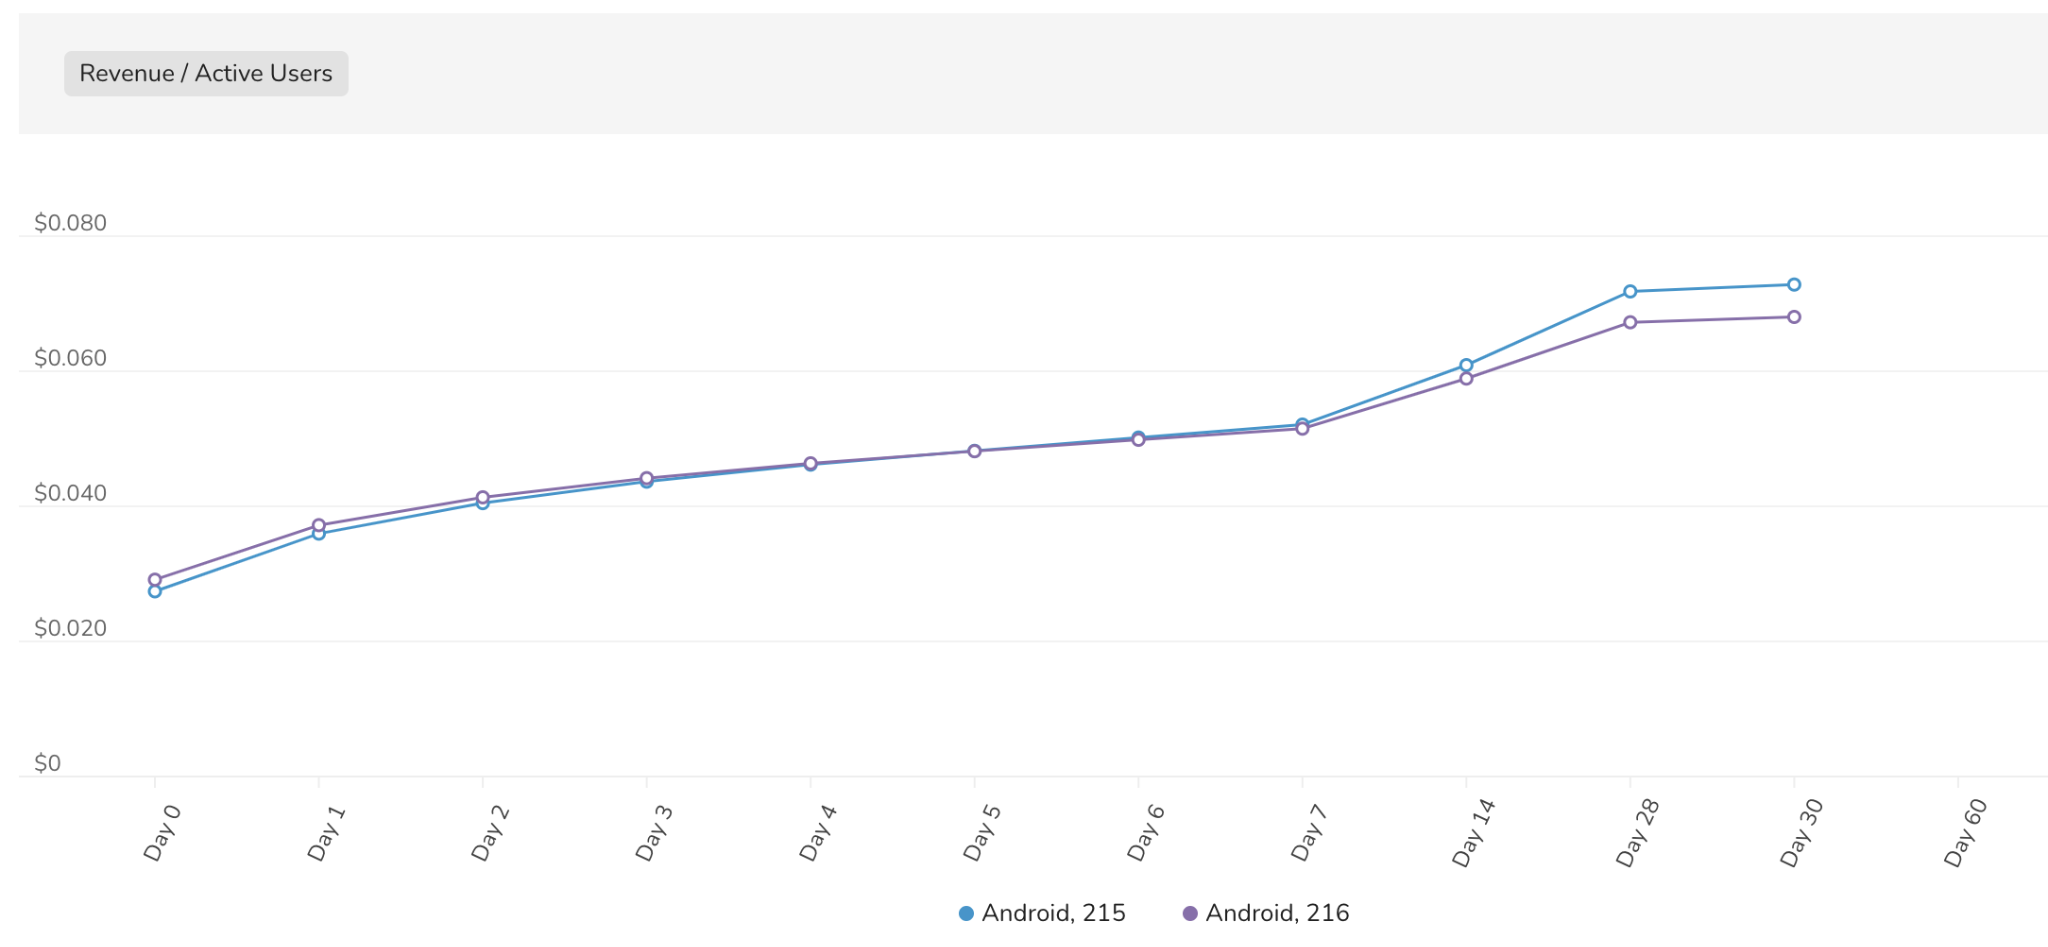

1.   This represent revenue tracking for two cohorts (A/B test) afer trying new ideas between the two groups.
2.   The ARPU for both cohorts grows steadily over time, but the rate of growth for blue cohort is little higher than the purple indicating its better received.
3.   It seems like the strategy for user cohort in blue might be more receptive than the purple as after launch it steadily starts to pick up.
